In [9]:
import DataPreprocessor as dp
import importlib

importlib.reload(dp)
# Örnek kullanım:
interval = '1h'
start_date = "09 Sep, 2022"
end_date = "8 Jul, 2024"
X_df, y = dp.get_historical_data(interval, start_date, end_date) # problem, X is df but y is np
feature_names = X_df.columns.tolist()
X = X_df.to_numpy()

AttributeError: module 'CoreFunctions' has no attribute 'add_symbol_close_to_dataframe'

Ugur's data

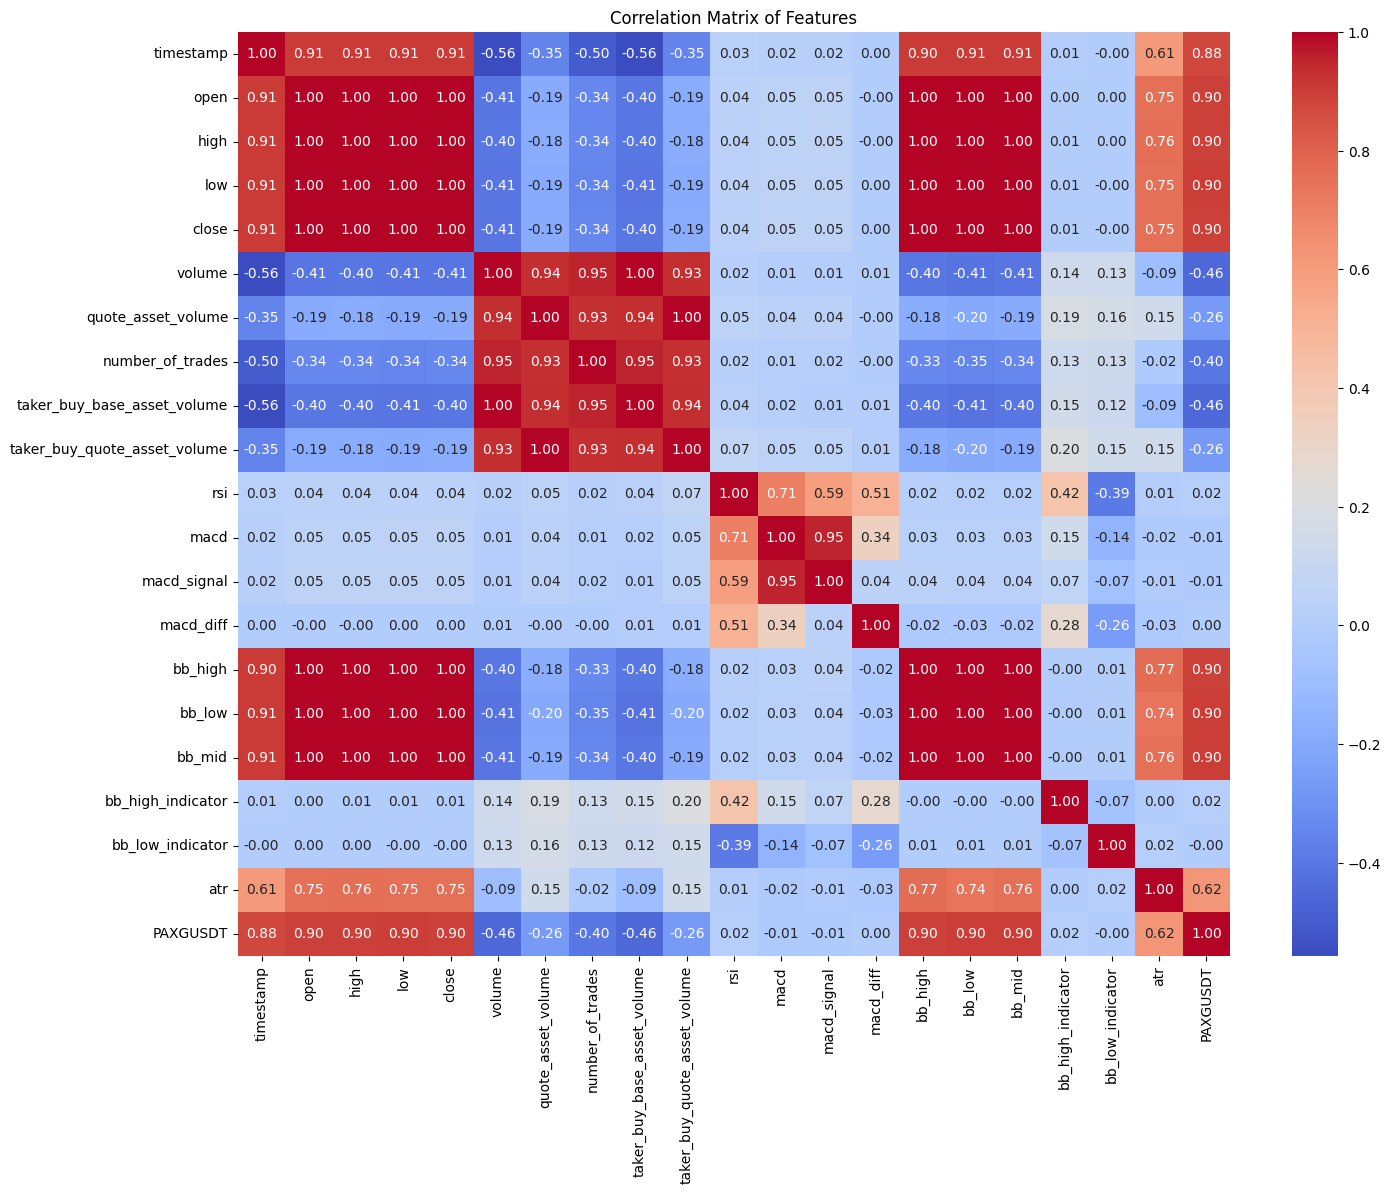

Correlation Matrix:
                              timestamp      open      high       low  \
timestamp                      1.000000  0.905769  0.905381  0.906242   
open                           0.905769  1.000000  0.999956  0.999934   
high                           0.905381  0.999956  1.000000  0.999903   
low                            0.906242  0.999934  0.999903  1.000000   
close                          0.905787  0.999924  0.999956  0.999954   
volume                        -0.557212 -0.406311 -0.403776 -0.409363   
quote_asset_volume            -0.354717 -0.187142 -0.183537 -0.191788   
number_of_trades              -0.500771 -0.341038 -0.338326 -0.344528   
taker_buy_base_asset_volume   -0.555470 -0.404307 -0.401594 -0.407156   
taker_buy_quote_asset_volume  -0.353075 -0.185494 -0.181569 -0.189733   
rsi                            0.028340  0.039369  0.041655  0.042016   
macd                           0.023074  0.050600  0.050914  0.051495   
macd_signal                    

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# y'nin dağılımını çizme
def plot_y_distribution(y):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y)
    plt.title("Distribution of Target Variable (y)")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

def plot_and_save_correlation_matrix(x):
    plt.figure(figsize=(16, 12))
    corr_matrix = x.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix of Features")
    plt.show()
    
    # Korelasyon matrisini yazdırma
    print("Correlation Matrix:")
    print(corr_matrix)
    
    # Korelasyon matrisini dosyaya kaydetme
    with open('correlation_matrix.txt', 'w') as f:
        f.write(corr_matrix.to_string())

def plot_and_print_correlation_matrix(x):
    plt.figure(figsize=(16, 12))
    corr_matrix = x.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix of Features")
    plt.show()
    
    # Korelasyon matrisini yazdırma
    print("Correlation Matrix:")
    print(corr_matrix)

# y'nin dağılımını çiz
#plot_y_distribution(y)

# x'in korelasyon matrisini çiz
plot_and_print_correlation_matrix(X_df)


In [6]:
from sklearn.decomposition import PCA

# Train Test Split
train_size = 0.8
train_sample_size = int(X.shape[0]*train_size)
X_train = X[:train_sample_size, :]
y_train = y[:train_sample_size]
X_test = X[train_sample_size:, :]
y_test = y[train_sample_size:]

print(f"Training Matrix: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test Matrix: {X_test.shape}")
print(f"Test labels {y_test.shape}")

# PCA uygulaması
pca = PCA(n_components=10)

Training Matrix: (12784, 21)
Training labels: (12784,)
Test Matrix: (3197, 21)
Test labels (3197,)


In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import numpy as np

k = 14  # Seçmek istediğiniz en iyi özellik sayısı
selector = SelectKBest(score_func=f_classif, k=k)  
#estimator = RandomForestClassifier()
#selector = RFE(estimator, n_features_to_select=k, step=1)

# Model pipeline oluşturma
pipeline = Pipeline([
    ('feature_selection', selector),
    ('classification', RandomForestClassifier(criterion="log_loss", class_weight="balanced_subsample", max_depth=10, n_estimators=500, min_samples_split=4))
])

# Modeli eğitmef
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Model performansını değerlendirme
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

selected_features = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_features]
print("Selected Features:", selected_feature_names)


Accuracy: 0.5667813575226776
Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.62      0.56      1443
           1       0.63      0.52      0.57      1754

    accuracy                           0.57      3197
   macro avg       0.57      0.57      0.57      3197
weighted avg       0.58      0.57      0.57      3197

Selected Features: ['close', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'rsi', 'macd', 'macd_signal', 'macd_diff', 'bb_high_indicator', 'bb_low_indicator', 'atr', 'PAXGUSDT']


F1-score macro: 0.5366250933810627
Accuracy: 0.536625321787971


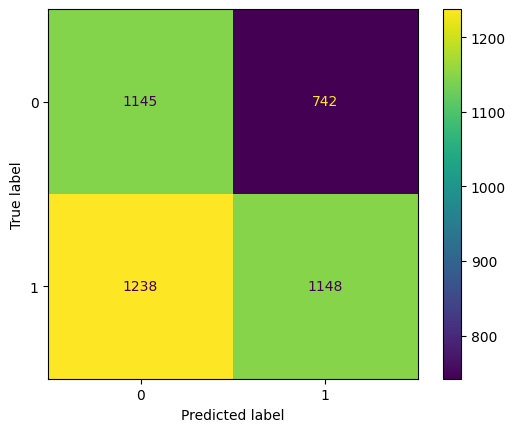

In [129]:
model = Sklearn_Classifier(sklearn_classifier=RandomForestClassifier(criterion="log_loss", class_weight="balanced_subsample", max_depth=10, n_estimators=500, min_samples_split=4))
model.train_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test) 

: 